In [87]:
import pandas as pd

In [88]:
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns

In [90]:
df=pd.read_csv("D:/M.Sc. Data Science/Sem-3/Stochastci/HMM/seattle-weather.csv")

In [91]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

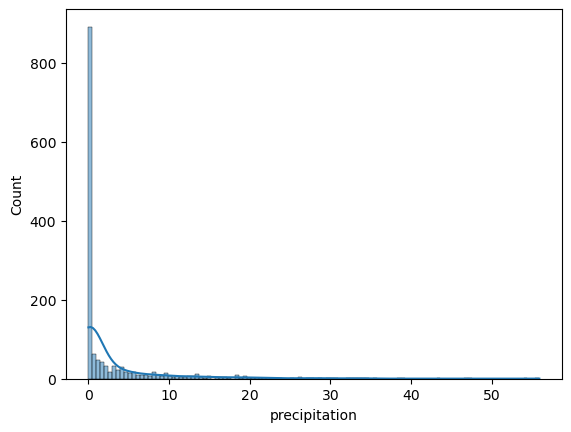

In [92]:
sns.histplot(df['precipitation'], kde=True)

In [93]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [94]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=2, labels=['low', 'high'])


In [95]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,low,low,high
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,high
2,2012-01-03,0.8,11.7,7.2,2.3,rain,low,low,low
3,2012-01-04,20.3,12.2,5.6,4.7,rain,low,low,high
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,high


In [96]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [97]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [98]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [99]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [100]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,low,low,high,low
1,rain,low,low,high,high
2,rain,low,low,low,low
3,rain,low,low,high,high
4,rain,low,low,high,low


In [101]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [102]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [103]:
X = X.astype(str)

In [104]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [105]:
X['concat_col_w_prep_wind_temp']="wthr_"+X['weather']+'_'+"p_"+ X['precipitation_d']+'_'+"wind_"+ X['wind_d']+'_'+"temp_"+ X['temp_max_d']

In [106]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low
...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low


In [107]:
!pip install hmmlearn

In [108]:
from hmmlearn.hmm import CategoricalHMM

In [109]:
model = CategoricalHMM(n_components=3)

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
le.fit(X['concat_col_w_prep_wind_temp'].to_list())

LabelEncoder()

In [113]:
#le.transform(['drizzle_low_veryhigh_medium'])

In [114]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [115]:
#label_encoder_output('drizzle_low_veryhigh_medium')

In [116]:
X['concat_col_label_encoded']=X['concat_col_w_prep_wind_temp'].apply(label_encoder_output)

In [117]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13
...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27


In [118]:
X[['concat_col_w_prep_wind_temp','concat_col_label_encoded']].head()

,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,wthr_drizzle_p_low_wind_high_temp_low,1
1,wthr_rain_p_high_wind_high_temp_low,9
2,wthr_rain_p_low_wind_low_temp_low,15
3,wthr_rain_p_high_wind_high_temp_low,9
4,wthr_rain_p_low_wind_high_temp_low,13


In [119]:
sequence_of_labels=X['concat_col_label_encoded'].to_list()

# HOME WORK 1 UNDERSTAND HMM , fit, decode, high level overview of the algorithms, you will come across algos like viterbi, balm welch, research these say from youtube, wiki, or any other source 

In [120]:
model.fit([sequence_of_labels])

CategoricalHMM(n_components=3, n_features=np.int64(30),
               random_state=RandomState(MT19937) at 0x29D1109C640)

In [121]:
model.decode([sequence_of_labels])

(-3625.4765271721653, array([2, 1, 1, ..., 2, 1, 2]))

In [122]:
model.decode([sequence_of_labels])[1][:20]

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1])

In [123]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [124]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded,hidden_state
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1,2
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,1
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,1
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,1
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13,2
...,...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11,2
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,1
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7,2
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27,1


# HOME WORK 2: INTERPRET THESE HIDDEN STATES (CLASS PROJECT 1)
- use distributions ,plots , any analytics you can think of make sense of these latent hidden states
- i.e. making sense of the model.
- -play with number of hidden states until the model is meaningful

In [125]:
model.transmat_

array([[9.70326303e-01, 4.00494491e-05, 2.96336479e-02],
       [2.00170828e-02, 4.50216946e-01, 5.29765971e-01],
       [3.52040906e-02, 9.19977336e-01, 4.48185731e-02]])

In [126]:
#

In [127]:
model.emissionprob_

array([[8.85381138e-03, 7.18431793e-20, 3.10327044e-02, 1.16459900e-10,
        1.62319875e-02, 1.47630439e-03, 5.23073539e-02, 1.51329256e-03,
        2.23848094e-02, 8.05951628e-05, 1.93412905e-02, 2.76054117e-03,
        5.67332281e-02, 2.61446841e-03, 7.98739584e-02, 4.25953993e-03,
        2.06541012e-02, 3.13684401e-03, 1.77170631e-02, 3.28771817e-03,
        1.81896381e-23, 4.63575320e-25, 3.33737117e-25, 9.32441105e-23,
        1.08750127e-23, 8.55276394e-13, 2.46567144e-01, 5.14401767e-11,
        4.04452210e-01, 4.72103422e-03],
       [2.65005188e-38, 7.12677858e-09, 1.97029364e-03, 1.83836802e-02,
        4.45659767e-30, 2.01054952e-02, 9.77894483e-03, 2.94257311e-02,
        1.28733647e-02, 1.73124541e-01, 5.37958511e-03, 2.48855782e-02,
        1.22602905e-05, 9.96136268e-02, 9.65170742e-03, 1.93777378e-01,
        3.96792286e-03, 9.31038413e-02, 2.80970547e-05, 2.52140748e-02,
        1.30579776e-02, 2.59299875e-03, 6.05722732e-03, 3.91421001e-03,
        1.12653232e-02,

# HOME WORK 3: Model Optimization
- learn aic , bic evalution metrics
-iterate modelling to optimize for evaluation metrics

In [128]:
# Total Categories in categorical columns

In [129]:
X['concat_col_w_prep_wind_temp'].value_counts()

concat_col_w_prep_wind_temp
wthr_sun_p_low_wind_low_temp_high         279
wthr_sun_p_low_wind_high_temp_high        172
wthr_rain_p_high_wind_high_temp_low       130
wthr_sun_p_low_wind_low_temp_low          118
wthr_rain_p_low_wind_low_temp_low          99
wthr_rain_p_low_wind_high_temp_low         97
wthr_sun_p_low_wind_high_temp_low          71
wthr_rain_p_medium_wind_high_temp_low      68
wthr_rain_p_low_wind_low_temp_high         60
wthr_rain_p_medium_wind_low_temp_low       46
wthr_fog_p_low_wind_low_temp_high          43
wthr_rain_p_low_wind_high_temp_high        41
wthr_fog_p_low_wind_low_temp_low           36
wthr_rain_p_high_wind_low_temp_low         31
wthr_rain_p_high_wind_high_temp_high       24
wthr_drizzle_p_low_wind_low_temp_high      22
wthr_drizzle_p_low_wind_low_temp_low       20
wthr_rain_p_high_wind_low_temp_high        16
wthr_rain_p_medium_wind_high_temp_high     16
wthr_rain_p_medium_wind_low_temp_high      13
wthr_fog_p_low_wind_high_temp_high         11
wthr_f

In [130]:
X['concat_col_w_prep_wind_temp'].value_counts().shape

(30,)

In [131]:
model.emissionprob_.shape

(3, 30)

In [132]:
emission_distribution=model.emissionprob_

In [133]:
str(le.inverse_transform([0])[0])

'wthr_drizzle_p_low_wind_high_temp_high'

In [134]:
def inverse_label_encoding(val):
    return str(le.inverse_transform([val])[0])

In [135]:
inverse_label_encoding(29)

'wthr_sun_p_low_wind_low_temp_low'

In [136]:
import numpy as np

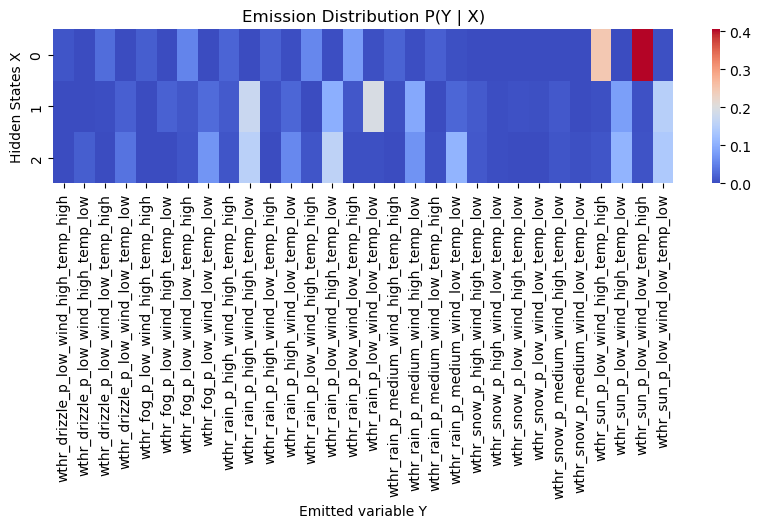

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
ax = sns.heatmap(emission_distribution, cmap='coolwarm', cbar=True)

# Set the title and axis labels
plt.title("Emission Distribution P(Y | X)")
plt.xlabel("Emitted variable Y")
plt.ylabel("Hidden States X")
# Replace y-ticks (encoded 0,1,2) with inverse label names
ax.set_xticks(np.arange(emission_distribution.shape[1]) + 0.5)
ax.set_xticklabels(
    [inverse_label_encoding(i) for i in range(emission_distribution.shape[1])],
    rotation=90
)

plt.show()

In [138]:
[inverse_label_encoding(i) for i in range(30)]

['wthr_drizzle_p_low_wind_high_temp_high',
 'wthr_drizzle_p_low_wind_high_temp_low',
 'wthr_drizzle_p_low_wind_low_temp_high',
 'wthr_drizzle_p_low_wind_low_temp_low',
 'wthr_fog_p_low_wind_high_temp_high',
 'wthr_fog_p_low_wind_high_temp_low',
 'wthr_fog_p_low_wind_low_temp_high',
 'wthr_fog_p_low_wind_low_temp_low',
 'wthr_rain_p_high_wind_high_temp_high',
 'wthr_rain_p_high_wind_high_temp_low',
 'wthr_rain_p_high_wind_low_temp_high',
 'wthr_rain_p_high_wind_low_temp_low',
 'wthr_rain_p_low_wind_high_temp_high',
 'wthr_rain_p_low_wind_high_temp_low',
 'wthr_rain_p_low_wind_low_temp_high',
 'wthr_rain_p_low_wind_low_temp_low',
 'wthr_rain_p_medium_wind_high_temp_high',
 'wthr_rain_p_medium_wind_high_temp_low',
 'wthr_rain_p_medium_wind_low_temp_high',
 'wthr_rain_p_medium_wind_low_temp_low',
 'wthr_snow_p_high_wind_high_temp_low',
 'wthr_snow_p_high_wind_low_temp_low',
 'wthr_snow_p_low_wind_high_temp_low',
 'wthr_snow_p_low_wind_low_temp_low',
 'wthr_snow_p_medium_wind_high_temp_low'

In [139]:
model.transmat_

array([[9.70326303e-01, 4.00494491e-05, 2.96336479e-02],
       [2.00170828e-02, 4.50216946e-01, 5.29765971e-01],
       [3.52040906e-02, 9.19977336e-01, 4.48185731e-02]])

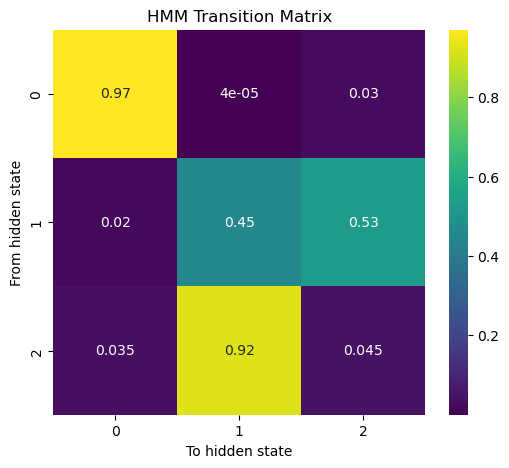

In [144]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# plot transition matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(pd.DataFrame(model.transmat_), annot=True, cmap='viridis')

# Labels and title
plt.xlabel('To hidden state')
plt.ylabel('From hidden state')
plt.title('HMM Transition Matrix')

plt.show()

In [148]:
model.startprob_

array([4.08122247e-65, 1.27354144e-38, 1.00000000e+00])

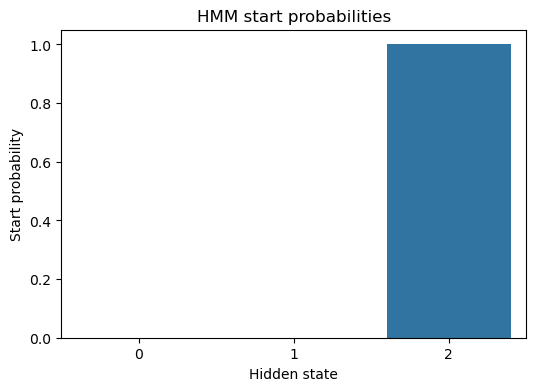

<Figure size 1200x400 with 0 Axes>

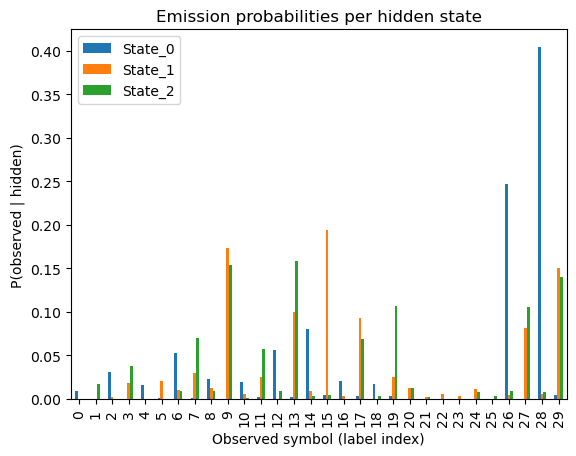

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.barplot(x=np.arange(len(model.startprob_)), y=model.startprob_)
plt.xlabel('Hidden state')
plt.ylabel('Start probability')
plt.title('HMM start probabilities')
plt.show()

em_df = pd.DataFrame(model.emissionprob_.T,
                     columns=[f'State_{i}' for i in range(model.n_components)])
plt.figure(figsize=(12,4))
em_df.plot(kind='bar', legend=True)
plt.xlabel('Observed symbol (label index)')
plt.ylabel('P(observed | hidden)')
plt.title('Emission probabilities per hidden state')
plt.show()